In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [2]:
filename = "/Users/shivampanwar/Desktop/SpotifyDatasets/Spotify2000.csv"

In [3]:
SpotifyData = pd.read_csv(filename)

In [4]:
SpotifyData.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [5]:
SpotifyData.tail(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65
1993,1994,Blueberry Hill,Fats Domino,adult standards,1959,133,50,49,-10,16,83,148,74,3,56


In [6]:
SpotifyData.dtypes

Index                      int64
Title                     object
Artist                    object
Top Genre                 object
Year                       int64
Beats Per Minute (BPM)     int64
Energy                     int64
Danceability               int64
Loudness (dB)              int64
Liveness                   int64
Valence                    int64
Length (Duration)         object
Acousticness               int64
Speechiness                int64
Popularity                 int64
dtype: object

In [7]:
SpotifyData = SpotifyData.drop(['Beats Per Minute (BPM)', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence','Length (Duration)','Acousticness','Speechiness'], axis=1)
train = SpotifyData.drop(SpotifyData, axis=1)
SpotifyData.head(5)

,Index,Title,Artist,Top Genre,Year,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,71
1,2,Black Night,Deep Purple,album rock,2000,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,59


In [8]:
SpotifyData.shape

(1994, 6)

In [9]:
duplicate_rows_SpotifyData = SpotifyData[SpotifyData.duplicated()]
print("number of duplicate rows: ", duplicate_rows_SpotifyData.shape)

number of duplicate rows:  (0, 6)


In [10]:
SpotifyData.count()

Index         1994
Title         1994
Artist        1994
Top Genre     1994
Year          1994
Popularity    1994
dtype: int64

In [11]:
SpotifyData = SpotifyData.drop_duplicates()
SpotifyData.head(5)

,Index,Title,Artist,Top Genre,Year,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,71
1,2,Black Night,Deep Purple,album rock,2000,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,59


In [12]:
SpotifyData.count()

Index         1994
Title         1994
Artist        1994
Top Genre     1994
Year          1994
Popularity    1994
dtype: int64

In [13]:
print(SpotifyData.isnull().sum())

Index         0
Title         0
Artist        0
Top Genre     0
Year          0
Popularity    0
dtype: int64


In [14]:
## Histogram for year

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a202574d0>]],
      dtype=object)

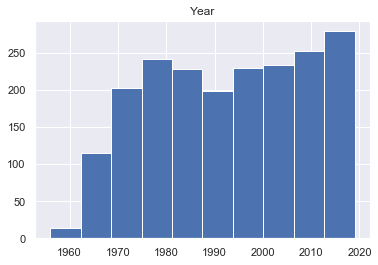

In [15]:
SpotifyData.hist(column='Year')

In [16]:
## Histogram for popularity 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a210bf410>]],
      dtype=object)

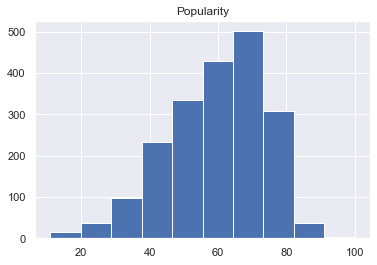

In [17]:
SpotifyData.hist(column='Popularity')

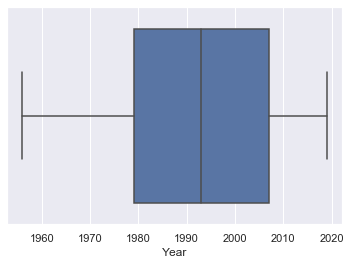

In [18]:
sns.boxplot(x=SpotifyData['Year'])

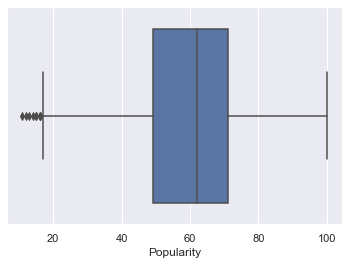

In [19]:
sns.boxplot(x=SpotifyData['Popularity'])

##Removiing outliers from popularity

In [20]:
Q1 = SpotifyData.quantile(0.25)
Q3 = SpotifyData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Index         996.50
Year           28.00
Popularity     21.75
dtype: float64


## Plotting histogram 

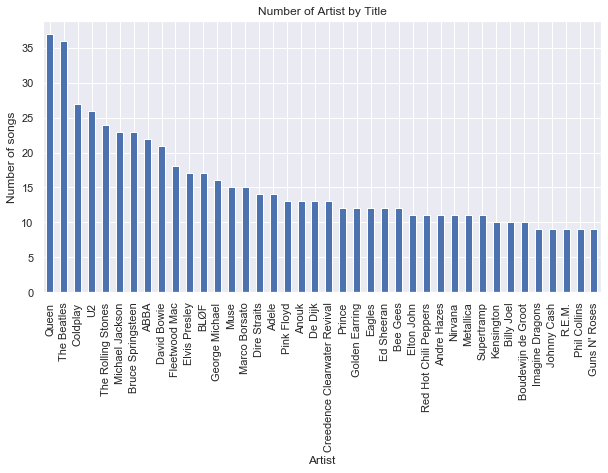

In [21]:
SpotifyData.Artist.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of Artist by Title")
plt.ylabel('Number of songs')
plt.xlabel('Artist');

##Heat map 

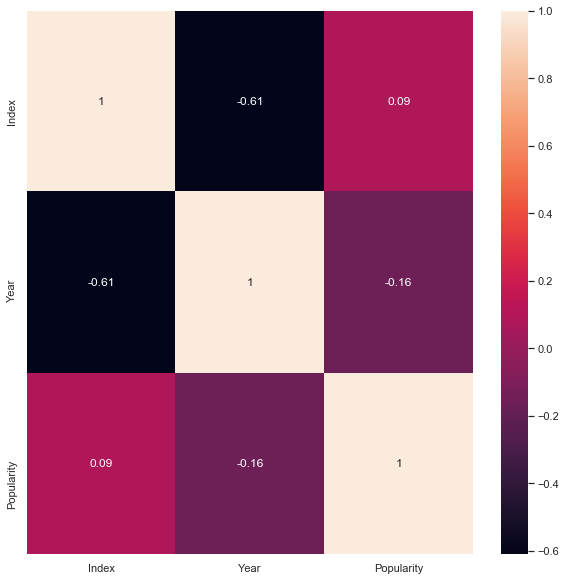

In [22]:
plt.figure(figsize=(10,10))
correlation_matrix = SpotifyData.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

##Scatter plot

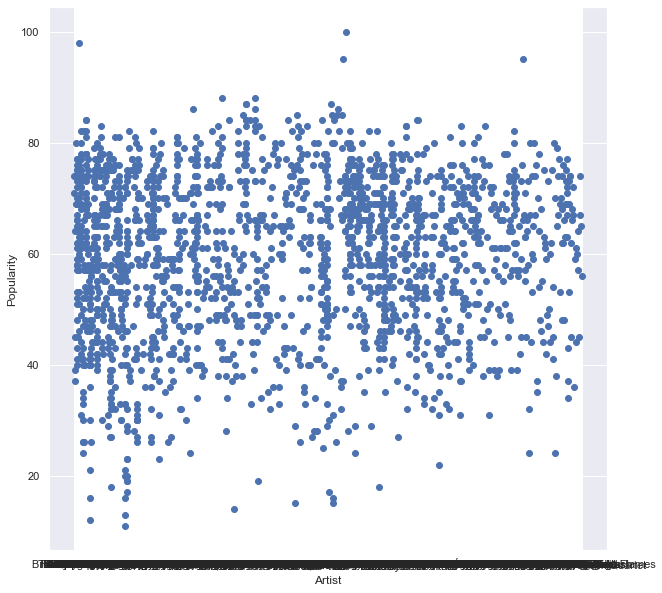

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(SpotifyData['Artist'], SpotifyData['Popularity'])
ax.set_xlabel('Artist')
ax.set_ylabel('Popularity')
plt.show()

In [24]:
filename = "/Users/shivampanwar/Desktop/SpotifyDatasets/Spotify2000.csv"
SpotifyData = pd.read_csv(filename)
SpotifyData.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


# K Neighbours Model

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
train, test = train_test_split(SpotifyData, test_size = 0.15)

In [34]:
#Define the set of features that we want to look at
features = ["Energy","Danceability", "Loudness (dB)","Liveness", "Valence", "Acousticness","Speechiness"]
target = ['Popularity']
#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [36]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(2)
knn.fit(x_train, y_train)
knn_pred = c.predict(x_test)
score= accuracy_score(y_test, knn_pred) * 100
print("Accuracy using Knn Tree: ", round(score, 1), "%")

Accuracy using Knn Tree:  72.0 %


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


# Decision Tree Classifier Model 

In [30]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [31]:
SpotifyData = SpotifyData.drop([ 'Loudness (dB)','Acousticness','Speechiness','Length (Duration)'], axis=1)
train = SpotifyData.drop(SpotifyData, axis=1)
SpotifyData.head(5)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Liveness,Valence,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,11,68,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,17,81,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,7,52,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,3,37,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,10,87,59


In [32]:
feature_cols =['Danceability','Beats Per Minute (BPM)','Popularity', 'Valence','Liveness','Energy']
X = SpotifyData[feature_cols] # Features
y = SpotifyData.Year  

In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # 70% training and 30% test

In [34]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 4.006677796327212


In [36]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.347245409015025
Mean Squared Error: 393.9382303839733
Root Mean Squared Error: 19.84787722614117


In [37]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
1805,1999,1977
1311,1985,1977
960,1974,2004
107,2009,2008
1557,1991,2004
...,...,...
1431,1987,2015
2,2001,1977
1526,1991,2004
1696,1996,2004


# AdaBoost Classifier Model 

In [41]:
filename = "/Users/shivampanwar/Desktop/SpotifyDatasets/Spotify2000.csv"
SpotifyData = pd.read_csv(filename)

In [42]:
train, test = train_test_split(SpotifyData, test_size = 0.15)

In [43]:
#Define the set of features that we want to look at
features = ["Energy","Danceability", "Loudness (dB)","Liveness", "Valence", "Acousticness","Speechiness"]
target = ['Popularity']
#Split the data into x and y test and train sets to feed them into a bunch of classifiers!
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [45]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=3)
ada.fit(x_train, y_train)
ada_pred = ada.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, ada_pred) * 100
print("Accuracy using ada: ", round(score, 2), "%")

Accuracy using ada:  2.67 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_pred)))

Mean Absolute Error: 12.49
Mean Squared Error: 246.64333333333335
Root Mean Squared Error: 15.704882467988526
